In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [30]:
df = pd.read_csv('train.csv' , usecols = ['Age', 'Fare', 'Survived'])

In [31]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12384\2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [34]:
X = df.iloc[:,[1,2]]
y = df.iloc[:,[0]]

In [35]:
X_train, X_test, y_train,y_test = train_test_split(X, y ,test_size =0.2 , random_state = 15)

C:\Users\User\AppData\Local\Temp\ipykernel_12384\468893779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

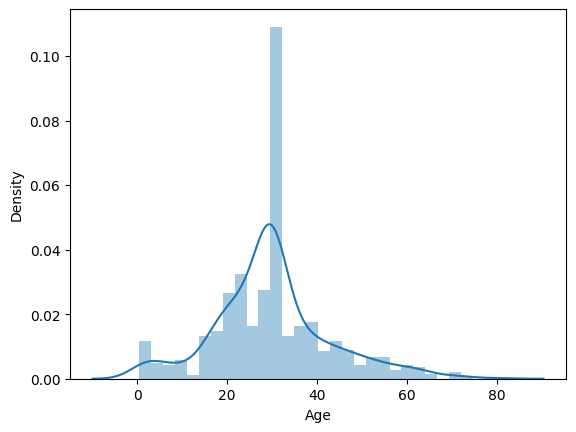

In [36]:
sns.distplot(X_train['Age'])

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

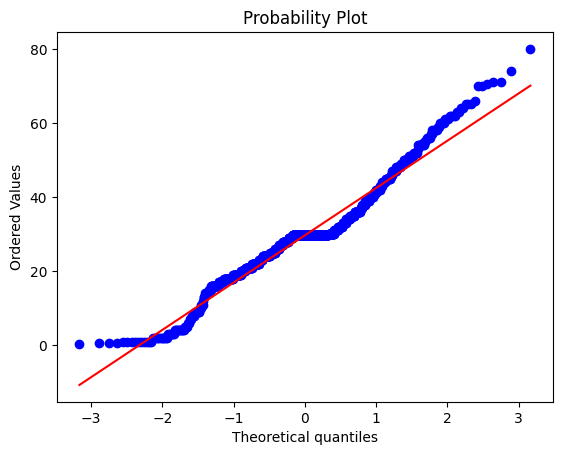

In [37]:
stats.probplot(df['Age'] , dist = 'norm' , plot =plt)

Text(0.5, 1.0, 'Q-Q Plot')

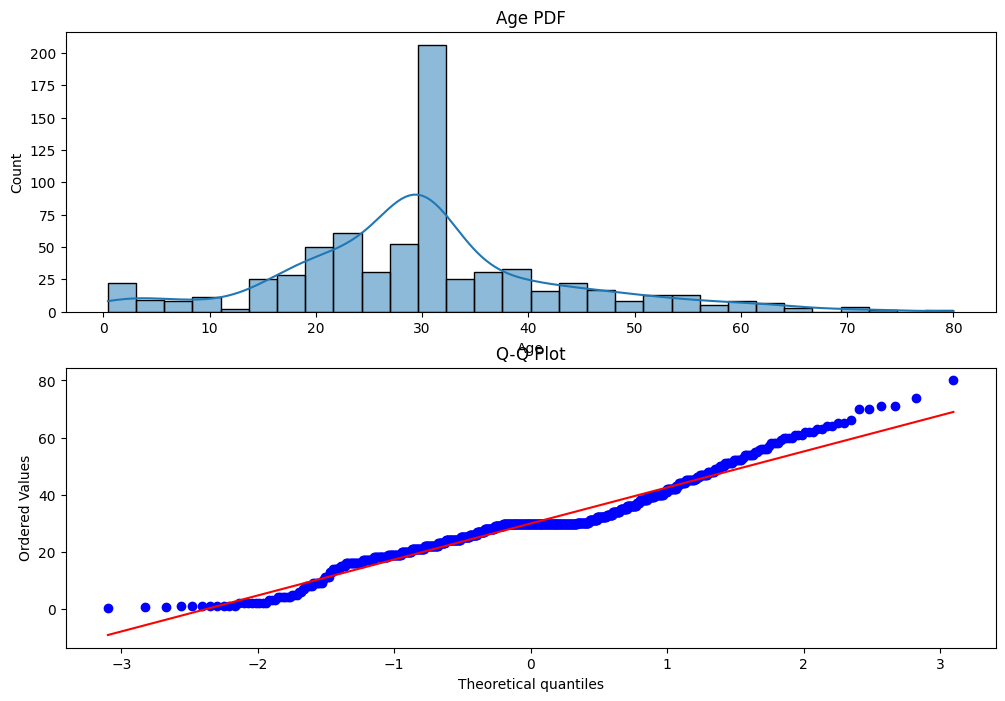

In [38]:
plt.figure(figsize = (12,8))
# Create a subplot for the histogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
sns.histplot(X_train['Age'], kde=True)
plt.title("Age PDF")

# Create a subplot for the Q-Q plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Q-Q Plot")

Text(0.5, 1.0, 'Q-Q Plot')

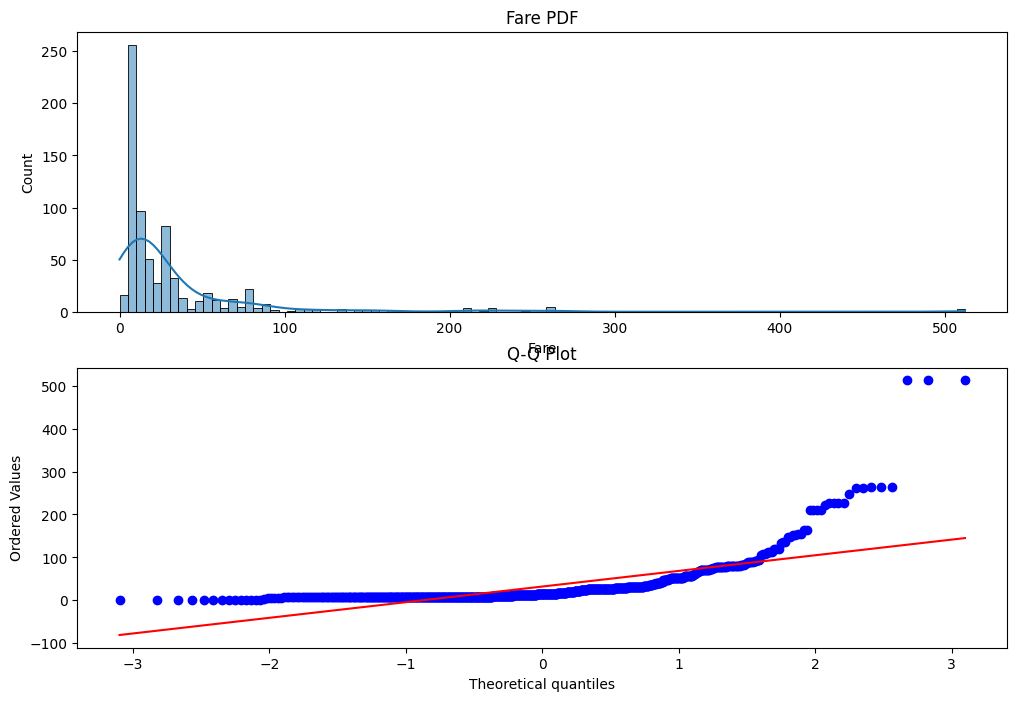

In [39]:
plt.figure(figsize = (12,8))
# Create a subplot for the histogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
sns.histplot(X_train['Fare'], kde=True)
plt.title("Fare PDF")

# Create a subplot for the Q-Q plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Q-Q Plot")

In [40]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [41]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [42]:
y_logi = clf1.predict(X_test)
y_deci = clf2.predict(X_test)

In [44]:
accuracy_score(y_test ,y_logi)

0.664804469273743

In [45]:
accuracy_score(y_test ,y_deci)

0.6703910614525139

In [46]:
trf = FunctionTransformer(func = np.log1p)

In [48]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [49]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [50]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [55]:
y_logi = clf1.predict(X_test_transform)
y_deci = clf2.predict(X_test_transform)

In [56]:
accuracy_score(y_test, y_logi)

0.6871508379888268

In [57]:
accuracy_score(y_test, y_deci)

0.659217877094972

In [60]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

LR 0.678027465667915
DT 0.6566167290886392


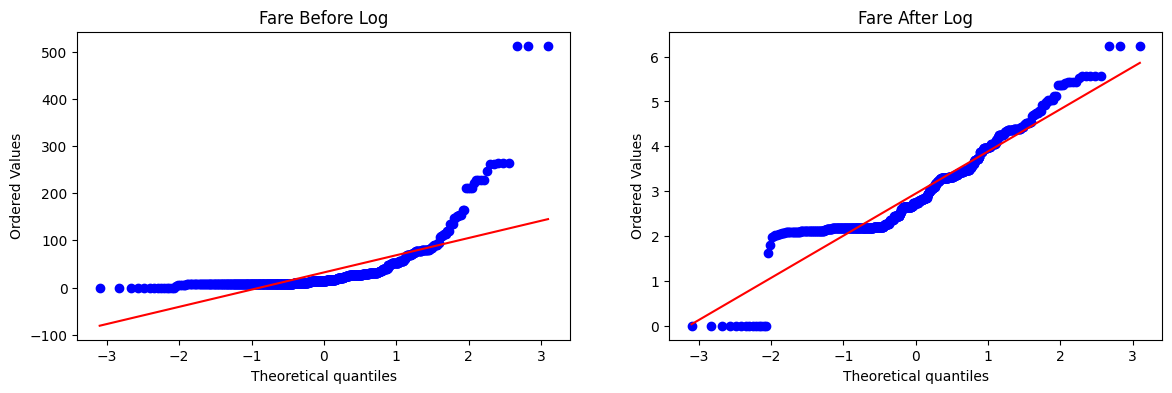

In [61]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

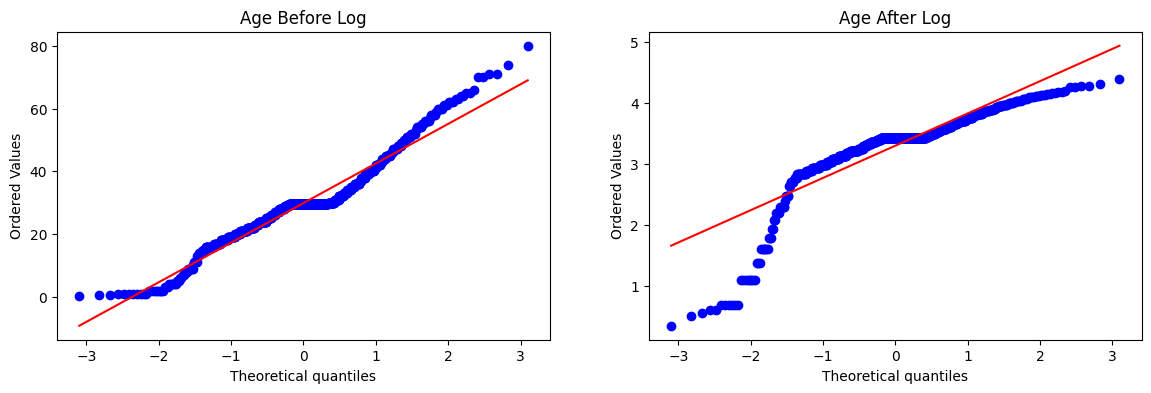

In [62]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [63]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6759776536312849
Accuracy DT 0.6536312849162011


E:\Ambu_newPython_06.08.2024\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


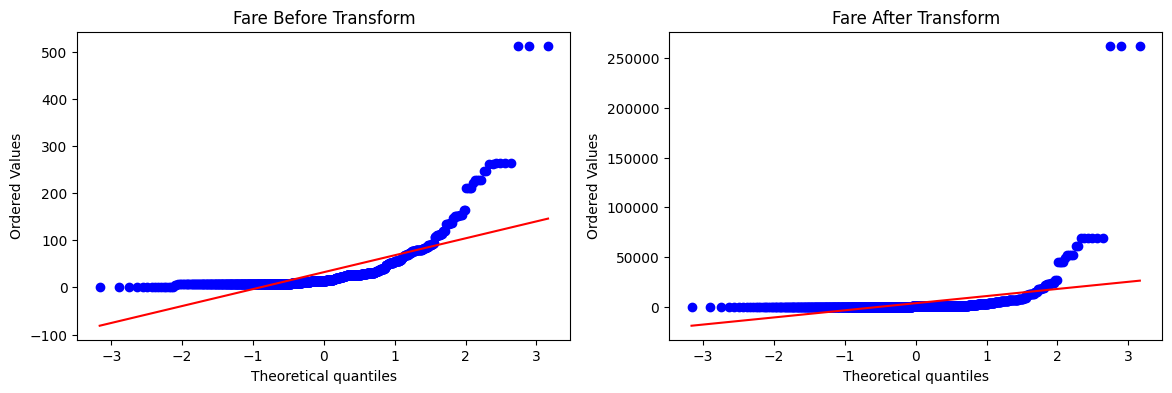

In [73]:
apply_transform(lambda x: x **2)


Accuracy 0.6712609238451936


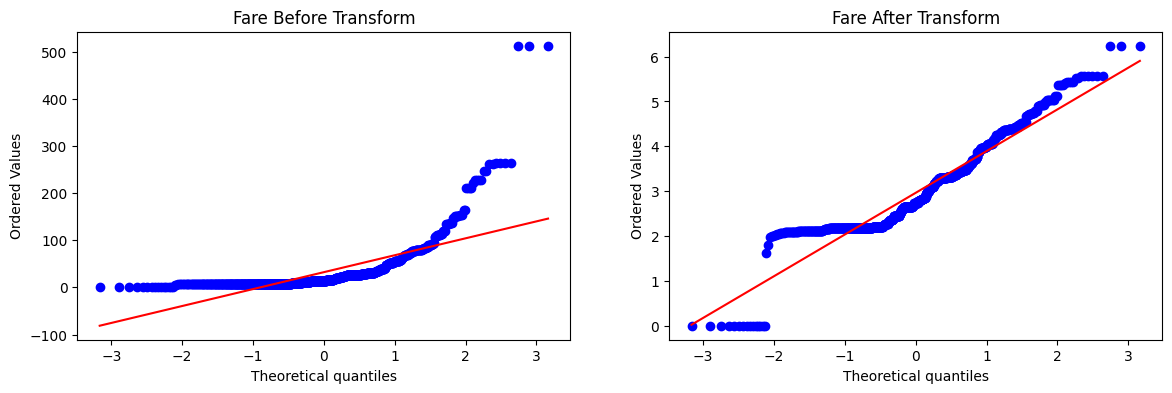

In [76]:
apply_transform(np.log1p)


Accuracy 0.61729088639201


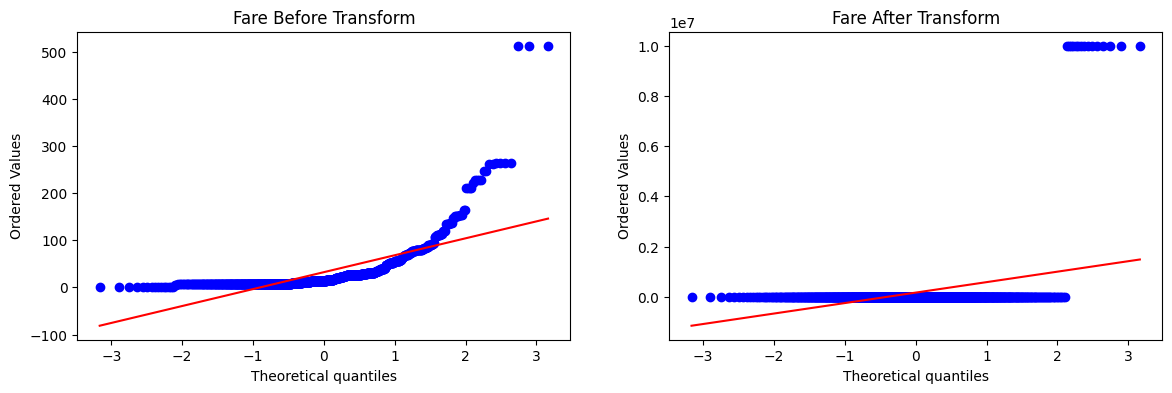

In [77]:
apply_transform(lambda x: (1/(x+0.0000001)))
